In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from tabulate import tabulate
from pydataset import data 
from math import sqrt 
from env import host, user, password, get_db_url
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
import tfplot
import os
import acquire 
import prepare
import sklearn as sk
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
N_SPLITS = 5



rng = np.random.RandomState(0)
np.random.seed(123)

In [5]:

iris_df = pd.read_csv (r'/Users/christophercurran/codeup-data-science/classification-exercises/iris.csv')
print(iris_df.head(3))
print('number of rows and columns:',iris_df.shape)
print('column names:', iris_df.columns)
print('data type:', iris_df.columns.dtype)
print(iris_df.describe())


FileNotFoundError: [Errno 2] No such file or directory: '/Users/christophercurran/codeup-data-science/classification-exercises/iris.csv'

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/18FOmTMu95L3R_PfcPICXyn1aU6iS1eX_VThGUBjYTcc/export?format=csv#gid=1023018493'

df_google_sheets = pd.read_csv(url)
df_google_sheets_sample = pd.read_csv(url).head(101)

In [ ]:
print(df_google_sheets.shape)
print(df_google_sheets.dtypes)
print(df_google_sheets.columns[:5])
# print only data types selected in columns
print(list(df_google_sheets.select_dtypes(['object']))) 
print(df_google_sheets.select_dtypes(['number']).apply(lambda col: col.max() - col.min()))


Download your spreadsheet exercises google sheet as an excel file (File → Download → Microsoft Excel). 

Read the Table1_CustDetails worksheet into a dataframe named df_excel.

In [6]:
df_excel = pd.read_excel (r'/Users/christophercurran/codeup-data-science/classification-exercises/innis_spreadsheet_exercises.xlsx')
df_excel_sample = pd.read_excel (r'/Users/christophercurran/codeup-data-science/classification-exercises/innis_spreadsheet_exercises.xlsx').head(101)

In [7]:
print(df_excel.shape)
print(df_excel.dtypes)
print(df_excel.columns[:5])
print(tabulate(df_excel.select_dtypes(['object']), headers = 'keys', tablefmt = 'psql'))
print(df_excel.select_dtypes(['number']).apply(lambda col: col.max() - col.min()))


(7049, 12)
customer_id           object
gender                object
is_senior_citizen    float64
partner               object
dependents            object
phone_service        float64
internet_service     float64
contract_type        float64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object
Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')
+------+---------------+----------+-----------+--------------+---------------------------+---------+
|      | customer_id   | gender   | partner   | dependents   | payment_type              | churn   |
|------+---------------+----------+-----------+--------------+---------------------------+---------|
|    0 | 0002-ORFBO    | Female   | Yes       | Yes          | Mailed check              | No      |
|    1 | 0003-MKNFE    | Male     | No        | No           | Mailed check              | No      |
|    2 | 0004-TLHLJ    | Ma

Read the data from this google sheet into a dataframe, df_google

In [ ]:
df_google = pd.read_csv(r'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv#gid=341089357')
print(df_google.head(3))
print(df_google.shape)
print(df_google.columns)
print(df_google.dtypes)
print(df_google.select_dtypes(['number']).apply(lambda col: col.max() - col.min()))
print(df_google.select_dtypes(['object']).apply(lambda col: col.unique().tolist()))





In [ ]:
print(df_google.nunique())

# Data Preparation Exercises

# Using the Iris Data

In [ ]:
iris_df = acquire.get_iris_data()
iris_df.head()



Reading from csv file...


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [ ]:
columns_to_drop = ['species_id','measurement_id']
iris_dropped = iris_df.drop(columns = columns_to_drop)
iris_dropped.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_rename = iris_dropped.rename(columns={'species_name': 'species'})
iris_rename.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris_rename.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
dummy_iris = pd.get_dummies(iris_df[['species_name']], dummy_na = False ,drop_first = [True, True])
df_iris = pd.concat([iris_rename, dummy_iris], axis=1)
df_iris.head()


In [ ]:
df = acquire.get_iris_data()


Reading from csv file...


In [ ]:

def prep_iris(df):
    df = df.drop(columns = ['species_id','measurement_id'])
    dummy_df = pd.get_dummies(df[['species_name']], dummy_na = False , drop_first = [True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df.rename(columns={'species_name': 'species'})

    


In [ ]:
iris_clean = prep_iris(df)
iris_clean.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_name_versicolor,species_name_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


# Using the Titanic dataset

In [ ]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

In [ ]:
titanic_df.drop_duplicates(inplace=True)

In [ ]:
titanic_df = titanic_df.drop(columns=['deck', 'age', 'embarked', 'class'])


In [ ]:
titanic_df.shape

In [ ]:
titanic_df.embark_town.fillna(value='Southampton')

In [ ]:
titanic_df.isnull().sum()

In [ ]:
dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na = False ,drop_first = [True, True])
dummy_df

In [ ]:
df = pd.concat([titanic_df, dummy_df], axis=1)
df


In [ ]:
df.drop(columns=['sex', 'embark_town'])


In [ ]:
df = acquire.get_titanic_data()

In [ ]:
def prep_titanic(df):
    df = df.drop_duplicates()
    df = df.drop(columns=['deck', 'embarked', 'class', 'age'])
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex', 'embark_town']], drop_first=[True,True])
    df = pd.concat([df, dummy_df], axis=1)
    return df.drop(columns=['sex', 'embark_town'])

In [ ]:
clean_titanic_data_v1 = prep_titanic(df)
clean_titanic_data_v1

# Using the Telco dataset

In [ ]:
df = acquire.get_telco_data()

Reading from csv file...


In [ ]:
df_drop = df.drop(df.columns.difference(['gender', 'payment_type_id', 'monthly_charges', 'total_charges', 'tenure','churn','contract_type_id', 'internet_service_type_id'], sort = False), axis=1)
df_drop


,payment_type_id,contract_type_id,internet_service_type_id,gender,tenure,monthly_charges,total_charges,churn
0,2,2,1,Female,9,65.60,593.3,No
1,2,1,1,Male,9,59.90,542.4,No
2,1,1,2,Male,4,73.90,280.85,Yes
3,1,1,2,Male,13,98.00,1237.85,Yes
4,2,1,2,Female,3,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...
7038,2,2,1,Female,13,55.15,742.9,No
7039,1,1,2,Male,22,85.10,1873.7,Yes
7040,2,1,1,Male,2,50.30,92.75,No
7041,2,3,1,Male,67,67.85,4627.65,No


In [ ]:
df_drop.melt(id_vars = ['contract_type_id'])

,contract_type_id,variable,value
0,2,payment_type_id,2
1,1,payment_type_id,2
2,1,payment_type_id,1
3,1,payment_type_id,1
4,1,payment_type_id,2
...,...,...,...
49296,2,churn,No
49297,1,churn,Yes
49298,1,churn,No
49299,3,churn,No


In [ ]:
df_drop

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,tenure,monthly_charges,total_charges
0,2,2,1,0002-ORFBO,Female,9,65.60,593.3
1,2,1,1,0003-MKNFE,Male,9,59.90,542.4
2,1,1,2,0004-TLHLJ,Male,4,73.90,280.85
3,1,1,2,0011-IGKFF,Male,13,98.00,1237.85
4,2,1,2,0013-EXCHZ,Female,3,83.90,267.4
...,...,...,...,...,...,...,...,...
7038,2,2,1,9987-LUTYD,Female,13,55.15,742.9
7039,1,1,2,9992-RRAMN,Male,22,85.10,1873.7
7040,2,1,1,9992-UJOEL,Male,2,50.30,92.75
7041,2,3,1,9993-LHIEB,Male,67,67.85,4627.65


In [ ]:
dummy_df = pd.get_dummies(df_drop[['sex', 'embark_town']], dummy_na = False ,drop_first = [True, True])


# exploratory analysis
section 1 - iris_db

    1. Acquire, prepare & split your data.

    2. Univariate Stats

        For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

        For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

        Document takeaways & any actions.

    3. Bivariate Stats

        Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

        For each measurement type, compute the descriptive statistics for each species.

        For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same 
        for the other measurement types.

        Document takeaways & any actions.

    4. Multivariate Stats

        Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

        Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

        Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. 
        Document takeaways from this visualization.

        Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. 
        If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

        Document takeaways and any actions.


In [111]:
df = acquire.get_iris_data()
df.describe()


Reading from csv file...


,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,2.000000,75.500000,5.843333,3.057333,3.758000,1.199333
std,0.819232,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,1.000000,4.300000,2.000000,1.000000,0.100000
25%,1.000000,38.250000,5.100000,2.800000,1.600000,0.300000
50%,2.000000,75.500000,5.800000,3.000000,4.350000,1.300000
75%,3.000000,112.750000,6.400000,3.300000,5.100000,1.800000
max,3.000000,150.000000,7.900000,4.400000,6.900000,2.500000


In [112]:
df = df.drop_duplicates()
df.shape

(150, 7)

In [113]:
iris_clean = prepare.prep_iris(df)
iris_clean.nunique()


sepal_length               35
sepal_width                23
petal_length               43
petal_width                22
species                     3
species_name_versicolor     2
species_name_virginica      2
dtype: int64

In [114]:
train_iris = prepare.train_validate_test_split(iris_clean,'species', seed=123)
train_iris

(     sepal_length  sepal_width  petal_length  petal_width     species  \
 79            5.7          2.6           3.5          1.0  versicolor   
 36            5.5          3.5           1.3          0.2      setosa   
 133           6.3          2.8           5.1          1.5   virginica   
 95            5.7          3.0           4.2          1.2  versicolor   
 18            5.7          3.8           1.7          0.3      setosa   
 139           6.9          3.1           5.4          2.1   virginica   
 20            5.4          3.4           1.7          0.2      setosa   
 31            5.4          3.4           1.5          0.4      setosa   
 6             4.6          3.4           1.4          0.3      setosa   
 115           6.4          3.2           5.3          2.3   virginica   
 91            6.1          3.0           4.6          1.4  versicolor   
 145           6.7          3.0           5.2          2.3   virginica   
 125           7.2          3.2       

In [115]:
# Stratify with categorical target variables
train, validate, test = prepare.train_validate_test_split(iris_clean, target='species')
train.shape, validate.shape, test.shape


((84, 7), (36, 7), (30, 7))

In [116]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_name_versicolor,species_name_virginica
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,5.870238,3.075000,3.771429,1.203571,0.333333,0.333333
std,0.769099,0.448256,1.734940,0.752577,0.474236,0.474236
min,4.400000,2.200000,1.200000,0.100000,0.000000,0.000000
25%,5.375000,2.800000,1.600000,0.400000,0.000000,0.000000
50%,5.800000,3.000000,4.250000,1.300000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000


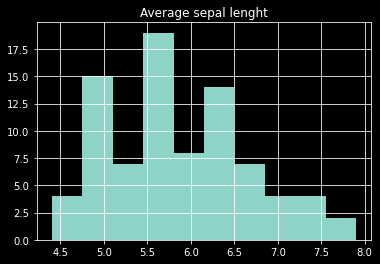

In [117]:
plt.title('Average sepal lenght')
train.sepal_length.hist()
plt.show()

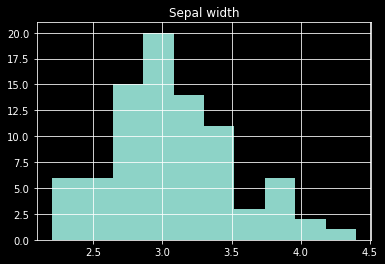

In [118]:
plt.title('Sepal width')
train.sepal_width.hist() 
plt.show()

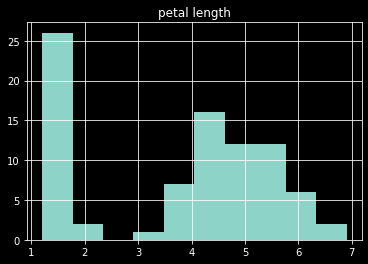

In [119]:
plt.title('petal length')
train.petal_length.hist() 
plt.show()

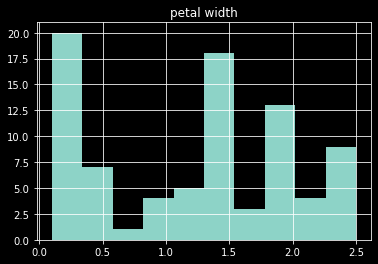

In [120]:
plt.title('petal width')
train.petal_width.hist() 
plt.show()

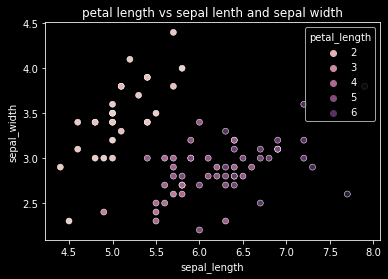

In [121]:
plt.title('petal length vs sepal lenth and sepal width')
sns.scatterplot(data=train, x=train.sepal_length, y= train.sepal_width, hue=train.petal_length)
plt.show()

takeaway: between 5.5 and 6.5 has a higher frequency of relationship between petal length and sepal length

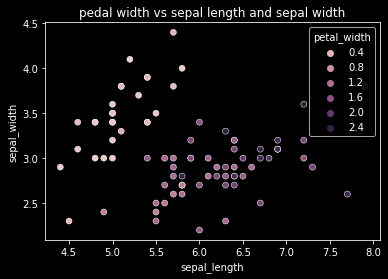

In [122]:
plt.title('pedal width vs sepal length and sepal width')
sns.scatterplot(data=train, x=train.sepal_length, y= train.sepal_width, hue=train.petal_width)
plt.show()

takeaway: there seems to be a weak relationship between petal width and sepal length 

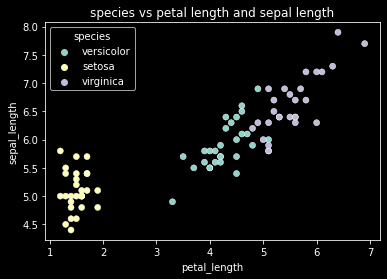

In [123]:
plt.title('species vs petal length and sepal length')
sns.scatterplot(data=train, x=train.petal_length, y= train.sepal_length, hue=train.species)
plt.show()

takeaway: with the specie "setosa" there seems to a weak relationship between petal length and sepal length. there is a strong relationship between petal length and sepal length with specie "versicolor" and specie "virginica". 

In [127]:
train.pivot_table(columns='species')

species,setosa,versicolor,virginica
petal_length,1.507143,4.271429,5.535714
petal_width,0.275000,1.314286,2.021429
sepal_length,5.089286,5.896429,6.625000
sepal_width,3.467857,2.796429,2.960714
species_name_versicolor,0.000000,1.000000,0.000000
species_name_virginica,0.000000,0.000000,1.000000


In [128]:
train.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,species_name_versicolor,species_name_virginica
species,,,,,,
setosa,5.089286,3.467857,1.507143,0.275000,0.0,0.0
versicolor,5.896429,2.796429,4.271429,1.314286,1.0,0.0
virginica,6.625000,2.960714,5.535714,2.021429,0.0,1.0


In [129]:
train.groupby(by='species').petal_length.mean().idxmax()

'virginica'

Takeaways: specie virginica has the greatest relationship between petal length and sepal length 

HO: petal length and septal length are independent

Ha: there is a relationship between the petel length and septal length 

In [131]:
p < alpha

True

In [132]:
prepare.correlation_test(train.petal_length, train.sepal_length, alpha = 0.05)

r = 0.8680
p = 0.0000

Reject H0


We reject the the null hypothesis and there is sufficient evidence to move forward.

# Excercise 2
Explore your titanic dataset more completely.

    Determine drivers of the target variable
    Determine if certain columns should be dropped
    Determine if it would be valuable to bin some numeric columns
    Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [2]:
df = acquire.get_titanic_data()
df_prep = df

Reading from csv file...


In [3]:
# replaced deck str "a tough g" with int so not to cause issues with IterativeImputer for regression model
df_prep[['deck']] = df_prep[['deck']].replace(to_replace="A",value="1")
df_prep[['deck']] = df_prep[['deck']].replace(to_replace="B",value="2")
df_prep[['deck']] = df_prep[['deck']].replace(to_replace="C",value="3")
df_prep[['deck']] = df_prep[['deck']].replace(to_replace="D",value="4")
df_prep[['deck']] = df_prep[['deck']].replace(to_replace="E",value="5")
df_prep[['deck']] = df_prep[['deck']].replace(to_replace="F",value="6")
df_prep[['deck']] = df_prep[['deck']].replace(to_replace="G",value="7")

In [4]:
df_prep.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,3,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,3,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [5]:
def clean_titanic_data(df):
    '''
    takes in a dataframe of the titanic dataset as it is acquired and returns a cleaned dataframe
    arguments: df: a pandas DataFrame with the expected feature names and columns
    return: clean_df: a dataframe with the cleaning operations performed on it
    '''
    df = df.drop_duplicates()
    df = df.drop(columns=['embarked', 'class', 'age','sibsp','passenger_id','alone','parch','sex','embark_town'], axis=1)
    #dummy_df = pd.get_dummies(df[['deck']], dummy_na=True)
    #df = pd.concat([df, dummy_df], axis=1)
    return df#.drop(columns=['deck'])

Confirmed that string was replace with int value

In [6]:
df_prep_clean = clean_titanic_data(df_prep)
df_prep_clean.reindex()

,survived,pclass,fare,deck
0,0,3,7.2500,NaN
1,1,1,71.2833,3
2,1,3,7.9250,NaN
3,1,1,53.1000,3
4,0,3,8.0500,NaN
...,...,...,...,...
886,0,2,13.0000,NaN
887,1,1,30.0000,2
888,0,3,23.4500,NaN
889,1,1,30.0000,3


In [23]:
ndf = df_prep_clean.copy(deep = True)
ndf.reindex()

,survived,pclass,fare,deck
0,0,3,7.2500,NaN
1,1,1,71.2833,3
2,1,3,7.9250,NaN
3,1,1,53.1000,3
4,0,3,8.0500,NaN
...,...,...,...,...
886,0,2,13.0000,NaN
887,1,1,30.0000,2
888,0,3,23.4500,NaN
889,1,1,30.0000,3


In [24]:
(ndf == 0).sum()

survived    549
pclass        0
fare         15
deck          0
dtype: int64

In [42]:
def gimmeThemStats(dFrame):
    """
    Description
    ----
    Outputs the general statistical description of the dataframe,
    outputs the correlation heatmap, and outputs a distribution plot.
    
    Parameters
    ----
    dFrame(DataFrame):
        The dataframe for which information will be displayed.
        
    Returns
    ----
    Nothing.
    
    """
    # Description
    print("Descriptive Stats:")
    display(dFrame.describe().T)
    
    # Heatmap
    plt.figure(figsize=(10, 8)) 
    plt.title("Heatmap", fontsize = 'x-large')
    sns.heatmap(dFrame.corr(), annot =True)
    
    # Distribution
    ### NOTE: I changed histplot to distplot
    fig, axes = plt.subplots(4, 2, figsize=(14,14))
    fig.suptitle("Distribution Plot", y=0.92, fontsize='x-large')
    fig.tight_layout(pad=4.0)

    for i,j in enumerate(ndf.columns[:-1]):
        sns.distplot(dFrame[j], ax=axes[i//2, i%2])

In [43]:
ndf.columns

Index(['survived', 'pclass', 'fare', 'deck'], dtype='object')

In [ ]:
gimmeThemStats(ndf)


In [44]:
dfMeanMed = ndf.copy(deep = True)

In [45]:
colsToFix = ['deck']
dfMeanMed[colsToFix].skew()

deck    0.418008
dtype: float64

In [ ]:
gimmeThemStats(dfMeanMed)

In [46]:
dfMeanMed.kurt() - ndf.kurt()

survived    0.0
pclass      0.0
fare        0.0
deck        0.0
dtype: float64

In [47]:
edf = ndf.copy(deep = True)

In [57]:
edf.drop(['survived'], axis=1)


,pclass,fare,deck
0,3,7.2500,NaN
1,1,71.2833,3
2,3,7.9250,NaN
3,1,53.1000,3
4,3,8.0500,NaN
...,...,...,...
886,2,13.0000,NaN
887,1,30.0000,2
888,3,23.4500,NaN
889,1,30.0000,3


In [58]:
edf

,survived,pclass,fare,deck
0,0,3,7.2500,NaN
1,1,1,71.2833,3
2,1,3,7.9250,NaN
3,1,1,53.1000,3
4,0,3,8.0500,NaN
...,...,...,...,...
886,0,2,13.0000,NaN
887,1,1,30.0000,2
888,0,3,23.4500,NaN
889,1,1,30.0000,3


In [16]:
# Choose an estimator if you don't want the default BayesianRidge() estimator
exEstimator = KNeighborsRegressor()
# Choose a style if you don't want the default ascending order
exStyle = 'descending'

# Imputer definition
exImputer = IterativeImputer(estimator=exEstimator, imputation_order=exStyle, random_state=42)

In [20]:
# Fit on the dataset
exImputer.fit(edf)

# Transform and convert to a dataframe
exTrans = pd.DataFrame(exImputer.transform(edf), columns = edf.columns)

exTrans.reindex()

,pclass,fare,deck
0,3.0,7.2500,5.8
1,1.0,71.2833,3.0
2,3.0,7.9250,5.8
3,1.0,53.1000,3.0
4,3.0,8.0500,5.8
...,...,...,...
886,2.0,13.0000,4.6
887,1.0,30.0000,2.0
888,3.0,23.4500,5.8
889,1.0,30.0000,3.0


Descriptive Stats:


,count,mean,std,min,25%,50%,75%,max
pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
deck,891.0,4.674299,1.445925,1.0,3.5000,5.6000,5.8,7.0000


KeyError: 'survived'

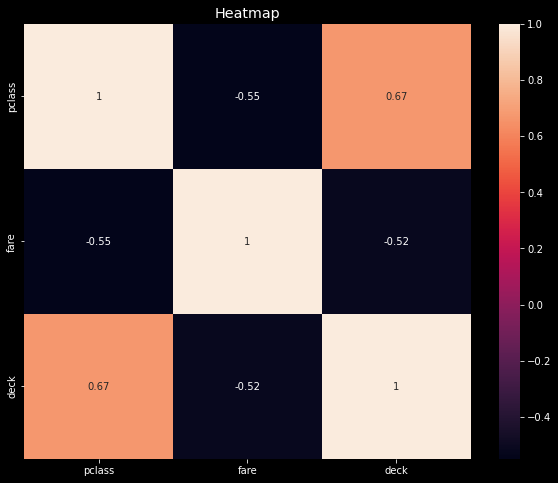

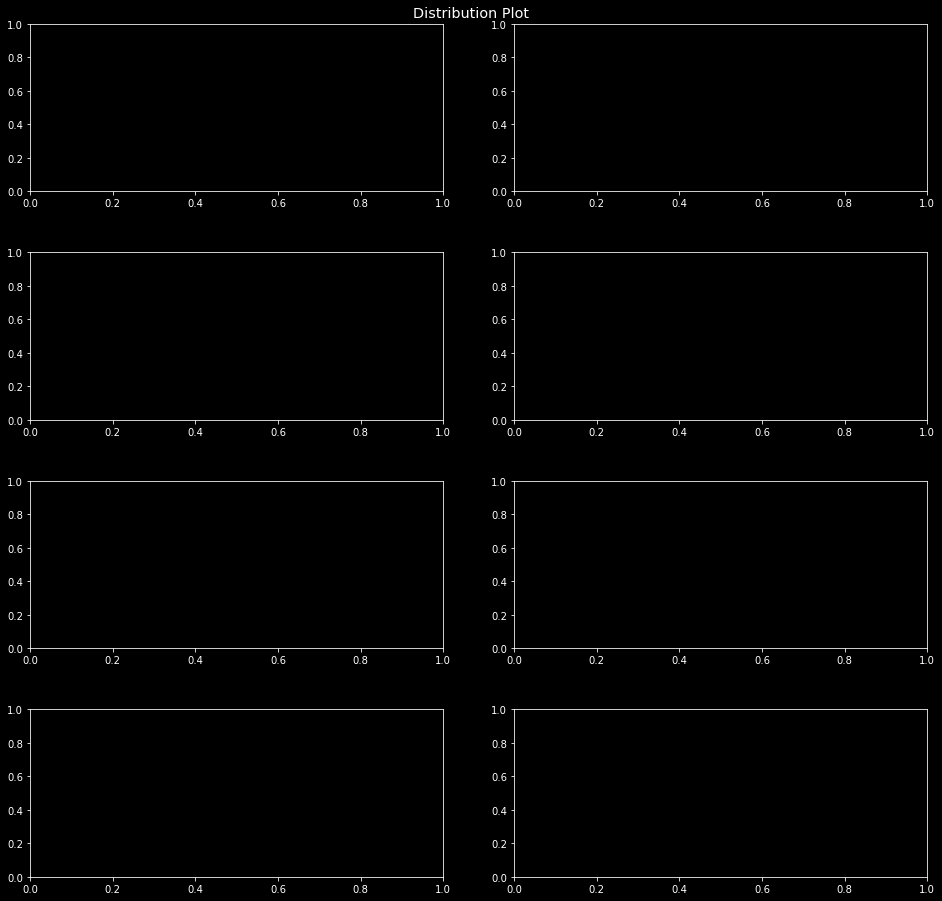

In [21]:
gimmeThemStats(exTrans)

In [22]:
exTrans.le(0).any()


pclass    False
fare       True
deck      False
dtype: bool

In [28]:
# Define X for features, where exTrans is the dataset with iterative imputation
X = exTrans.drop('survived', axis=1)

# Define y
y = exTrans['survived']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)


In [29]:
y_train.value_counts()


0.0    439
1.0    273
Name: survived, dtype: int64

In [30]:
y_test.value_counts()

0.0    110
1.0     69
Name: survived, dtype: int64

In [31]:
# Scaler definition
exScaler = StandardScaler()

# Fit and transform the train set
exScaledTrainSet = exScaler.fit_transform(X_train)
# Transform the test set
exScaledTestSet = exScaler.transform(X_test)

In [32]:
# Model definition
exModel = ExtraTreesClassifier()

# Fit the model and training sets
exModel.fit(exScaledTrainSet, y_train)

# Predict
exPredict = exModel.predict(exScaledTestSet)


In [33]:
exAccScore = accuracy_score(y_test, exPredict)
print(f"Our model got an accuracy score of {exAccScore*100:.4f}% when using a Decision Tree Regressor estimator to Iteratively Impute\nin a descending fashion, after predictions from Extra Trees Classifier.")


Our model got an accuracy score of 81.5642% when using a Decision Tree Regressor estimator to Iteratively Impute
in a descending fashion, after predictions from Extra Trees Classifier.


In [ ]:
dead_alive_y = y_train
dead_alive_y

In [ ]:
X_train

# DecisionTreeRegressor 'deck'

In [41]:
imp = IterativeImputer(estimator=KNeighborsRegressor(n_estimators=100))
train1[['deck']] = imp.fit_transform(train1[['deck']])
validate1[['deck']] = imp.transform(validate1[['deck']])
test1[['deck']] = imp.transform(test1[['deck']])

TypeError: __init__() got an unexpected keyword argument 'n_estimators'

In [44]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [54]:
train_validate_test_split(df_prep_clean,'survived', seed=123)

(     survived  pclass      fare deck
 583         0       1   40.1250    1
 165         1       3   20.5250  NaN
 50          0       3   39.6875  NaN
 259         1       2   26.0000  NaN
 306         1       1  110.8833  NaN
 ..        ...     ...       ...  ...
 313         0       3    7.8958  NaN
 636         0       3    7.9250  NaN
 222         0       3    8.0500  NaN
 485         0       3   25.4667  NaN
 744         1       3    7.9250  NaN
 
 [498 rows x 4 columns],
      survived  pclass      fare deck
 610         0       3   31.2750  NaN
 424         0       3   20.2125  NaN
 568         0       3    7.2292  NaN
 334         1       1  133.6500  NaN
 101         0       3    7.8958  NaN
 ..        ...     ...       ...  ...
 176         0       3   25.4667  NaN
 372         0       3    8.0500  NaN
 737         1       1  512.3292    2
 862         1       1   25.9292    4
 26          0       3    7.2250  NaN
 
 [214 rows x 4 columns],
      survived  pclass      fare d

In [55]:
train.shape, validate.shape, test.shape

((498, 4), (214, 4), (179, 4))

In [99]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

train, test = train_test_split(df_prep_clean, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)
# Validate my split.

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')



train -> (498, 4)
validate -> (214, 4)
test -> (179, 4)


In [100]:
train1 = train
validate1 = validate
test1 = test

In [101]:
train_survived = train[['survived']].copy()
train_validate = validate[['survived']].copy()
train_test = test[['survived']].copy()

In [102]:
train1 = train.drop(columns='survived', axis=1)
validate1 = validate.drop(columns='survived', axis=1)
test1 = test.drop(columns='survived', axis=1)

In [103]:
imp = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100))
train1[['deck']] = imp.fit_transform(train1[['deck']])
validate1[['deck']] = imp.transform(validate1[['deck']])
test1[['deck']] = imp.transform(test1[['deck']])

#imp = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100))
#imp.fit(train_drop)
#df_predict = pd.DataFrame(imp.transform(train_drop), columns = train_drop.columns)
# df_predict['deck'] = df_predict['deck'].apply(lambda x: round(x))
#df_predict

In [104]:
train1

,pclass,fare,deck
583,1,40.1250,1.00000
165,3,20.5250,3.40566
50,3,39.6875,3.40566
259,2,26.0000,3.40566
306,1,110.8833,3.40566
...,...,...,...
313,3,7.8958,3.40566
636,3,7.9250,3.40566
222,3,8.0500,3.40566
485,3,25.4667,3.40566


In [105]:
train_join = train1 
train_join[['survived']] = train_survived[['survived']]
train_join['deck'] = train_join['deck'].apply(lambda x: round(x))
train_join.reindex()



,pclass,fare,deck,survived
583,1,40.1250,1,0
165,3,20.5250,3,1
50,3,39.6875,3,0
259,2,26.0000,3,1
306,1,110.8833,3,1
...,...,...,...,...
313,3,7.8958,3,0
636,3,7.9250,3,0
222,3,8.0500,3,0
485,3,25.4667,3,0


In [578]:
# using imputer and randomforestregressor to fill in nan values in column 'deck'
#imp = IterativeImputer(estimator=RandomForestRegressor(n_estimators=100))
#train1[['deck']] = imp.fit_transform(train1[['deck']])
#validate1[['deck']] = imp.transform(validate1[['deck']])
#test1[['deck']] = imp.transform(test1[['deck']])
#test1['deck'] = test1['deck'].apply(lambda x: round(x))


confirm that imputer has changed all nan value to estimated value

list pclass per value count

In [28]:
train_join.pclass.value_counts()

3    269
1    117
2    112
Name: pclass, dtype: int64

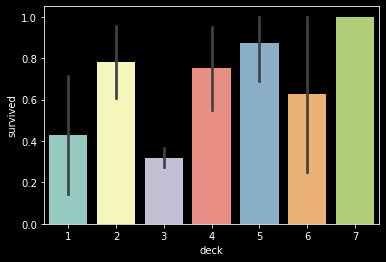

In [29]:
sns.barplot(data=train_join, x='deck', y='survived')
plt.show()

<AxesSubplot:xlabel='deck', ylabel='pclass'>

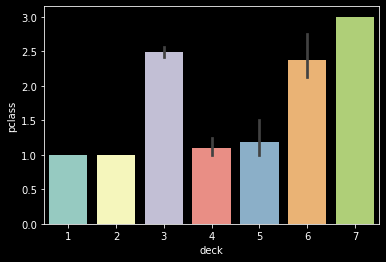

In [30]:
sns.barplot(data=train_join, x='deck', y='pclass')

In [31]:
train_join.deck

583    1
165    3
50     3
259    3
306    3
      ..
313    3
636    3
222    3
485    3
744    3
Name: deck, Length: 498, dtype: int64

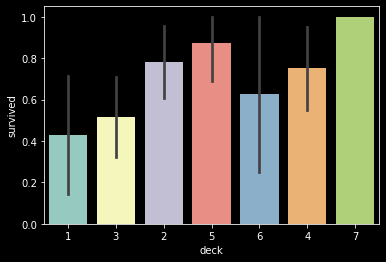

In [17]:
sns.barplot(data=train, x='deck', y='survived')
plt.show()

In [32]:
train_melt = train_join.melt(id_vars=['deck', 'fare', 'pclass'], value_name='survived')
train_melt.reindex()



,deck,fare,pclass,variable,survived
0,1,40.1250,1,survived,0
1,3,20.5250,3,survived,1
2,3,39.6875,3,survived,0
3,3,26.0000,2,survived,1
4,3,110.8833,1,survived,1
...,...,...,...,...,...
493,3,7.8958,3,survived,0
494,3,7.9250,3,survived,0
495,3,8.0500,3,survived,0
496,3,25.4667,3,survived,0


In [33]:
pivot_table_deck = train_melt.pivot_table(columns='deck')
pivot_table_deck

deck,1,2,3,4,5,6,7
fare,38.825000,122.438587,24.046354,62.93667,49.349481,22.282287,16.7
pclass,1.000000,1.000000,2.494090,1.10000,1.187500,2.375000,3.0
survived,0.428571,0.782609,0.319149,0.75000,0.875000,0.625000,1.0


In [593]:
pivot_table = train_melt.pivot_table(columns='pclass')
pivot_table

pclass,1,2,3
deck,3.076923,3.169643,3.055762
fare,82.491595,20.544904,13.197799
survived,0.606838,0.500000,0.237918


takeaway: decks 1 though 3 are first class. Decks 4 a mix of first class and second. 5 through 6 a mix of 2nd and 3rd class. Deck 7 all 3 class. 

<AxesSubplot:>

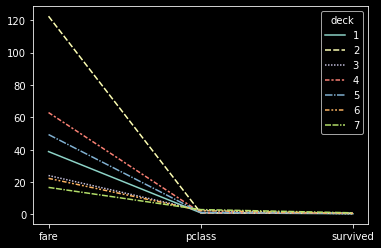

In [594]:
sns.lineplot(data=pivot_table_deck)

<AxesSubplot:xlabel='deck', ylabel='survived'>

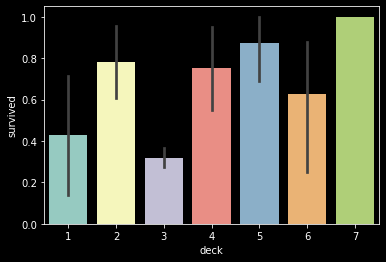

In [595]:
sns.barplot(data=train_melt, x='deck', y='survived')

<AxesSubplot:xlabel='deck', ylabel='pclass'>

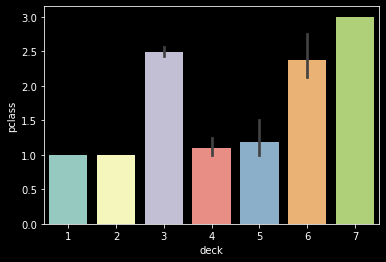

In [596]:
sns.barplot(data=train_melt, x='deck', y='pclass')

one dont use target variage for .transform on data .